In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
pp_df = pd.read_csv('./dist/pp_df_5.csv')
ps_df = pd.read_csv('./dist/ps_df_5.csv')

if 'session' not in pp_df.columns:
    pp_df['session'] = pp_df.groupby('player').cumcount()//pp_df['period'].max()+1
    ps_df['session'] = ps_df.groupby('player').cumcount()//ps_df['period'].max()+1
print(f"Play-for-Pair rows {len(pp_df)}")
print(f"Play-for-Self rows {len(ps_df)}")
ps_df

Play-for-Pair rows 720
Play-for-Self rows 720


,player,period,decision,payoff,session
9,A,10,False,1,1
30,B,1,False,1,1
118,D,14,False,8,2
558,C,4,False,9,10
605,A,6,True,8,11


Play-for-Pair Stag( 161; 22.36% ) Hare( 559; 77.64% )
Play-for-Self Stag( 006; 0.83% ) Hare( 714; 99.17% )


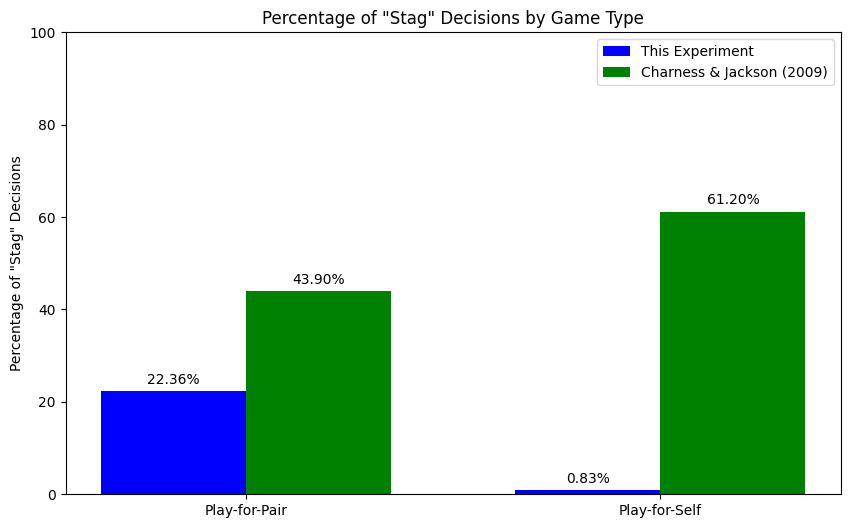

In [114]:
## Percentages

# Play-for-Pair
pp_total_decisions = len(pp_df)
pp_yes_decisions = pp_df[pp_df['decision'] == True].shape[0]
pp_percentage_yes = (pp_yes_decisions / pp_total_decisions) * 100

# Play-for-Self
ps_total_decisions = len(ps_df)
ps_yes_decisions = ps_df[ps_df['decision'] == True].shape[0]
ps_percentage_yes = (ps_yes_decisions / ps_total_decisions) * 100

# Your experiment's percentages
your_percentages = [pp_percentage_yes, ps_percentage_yes]

# Papers Results
paper_pp_percentage = 43.9
paper_ps_percentage = 61.2

paper_percentages = [paper_pp_percentage, paper_ps_percentage]

# Data for plotting
game_types = ['Play-for-Pair', 'Play-for-Self']
x = np.arange(len(game_types))  # the label locations
width = 0.35  # the width of the bars

# Create the bar chart
plt.figure(figsize=(10, 6))
rects1 = plt.bar(x - width/2, your_percentages, width, label='This Experiment', color=['blue'])
rects2 = plt.bar(x + width/2, paper_percentages, width, label='Charness & Jackson (2009)', color=['green'])

# Add percentage labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.2f}%',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Chart formatting
plt.title('Percentage of "Stag" Decisions by Game Type')
plt.ylabel('Percentage of "Stag" Decisions')
plt.xticks(x, game_types)
plt.ylim(0, 100)
plt.legend()

print(f"Play-for-Pair Stag( {pp_yes_decisions:03d}; {pp_yes_decisions/pp_total_decisions:.02%} ) Hare( {pp_total_decisions - pp_yes_decisions:03d}; {(pp_total_decisions - pp_yes_decisions)/pp_total_decisions:.02%} )")
print(f"Play-for-Self Stag( {ps_yes_decisions:03d}; {ps_yes_decisions/ps_total_decisions:.02%} ) Hare( {ps_total_decisions - ps_yes_decisions:03d}; {(ps_total_decisions - ps_yes_decisions)/ps_total_decisions:.02%} )")

plt.show()



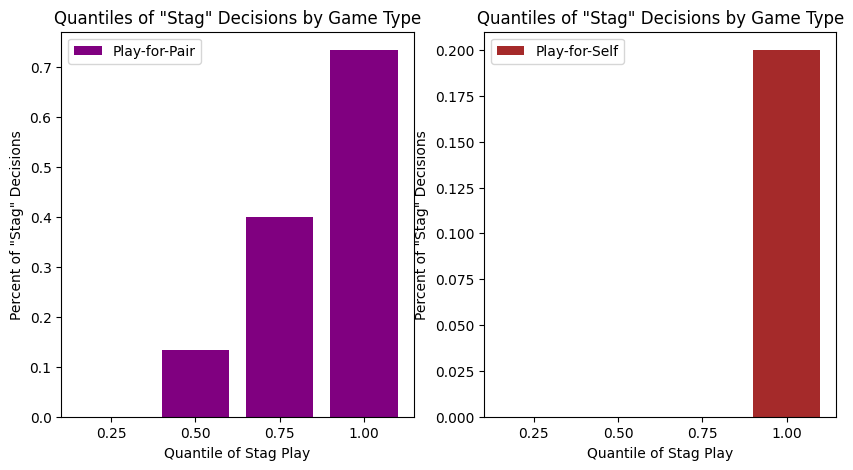

In [107]:
# Plot quantiles of stag play for each game type
ps_quantiles = (ps_df.groupby(['session','player'])['decision'].mean()).quantile([0.25, 0.5, 0.75, 1])
pp_quantiles = (pp_df.groupby(['session','player'])['decision'].mean()).quantile([0.25, 0.5, 0.75, 1])
# Plot the quantiles as a bar chart
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(pp_quantiles.index, pp_quantiles.values, width=0.2, label='Play-for-Pair', color='purple')
plt.legend()
plt.title('Quantiles of "Stag" Decisions by Game Type')
plt.ylabel('Percent of "Stag" Decisions')
plt.xlabel('Quantile of Stag Play')
plt.xticks(ps_quantiles.index)

plt.subplot(1,2,2)
plt.bar(ps_quantiles.index, ps_quantiles.values, width=0.2, label='Play-for-Self', color='brown')
plt.legend()
plt.title('Quantiles of "Stag" Decisions by Game Type')
plt.ylabel('Percent of "Stag" Decisions')
plt.xlabel('Quantile of Stag Play')
plt.xticks(ps_quantiles.index)
plt.show()



In [108]:
# Last segment sum of decesion
print("Table-3; Stag Vote Totals for groups in the last period of a segment")
print(pp_df[pp_df['period']==15].groupby(['session','player'])['decision'].sum().groupby('session').sum().value_counts())
print(ps_df[ps_df['period']==15].groupby(['session','player'])['decision'].sum().groupby('session').sum().value_counts())

Table-3; Stag Vote Totals for groups in the last period of a segment
decision
0    5
1    5
2    2
Name: count, dtype: int64
decision
0    23
1     1
Name: count, dtype: int64


In [109]:
# first segment sum of decesion
print("Stag Vote Totals for groups in the first period of a segment")
print(pp_df[pp_df['period']==1].groupby(['session','player'])['decision'].sum().groupby('session').sum().value_counts())
print(ps_df[ps_df['period']==1].groupby(['session','player'])['decision'].sum().groupby('session').sum().value_counts())

Stag Vote Totals for groups in the first period of a segment
decision
0    7
1    5
Name: count, dtype: int64
decision
0    24
Name: count, dtype: int64


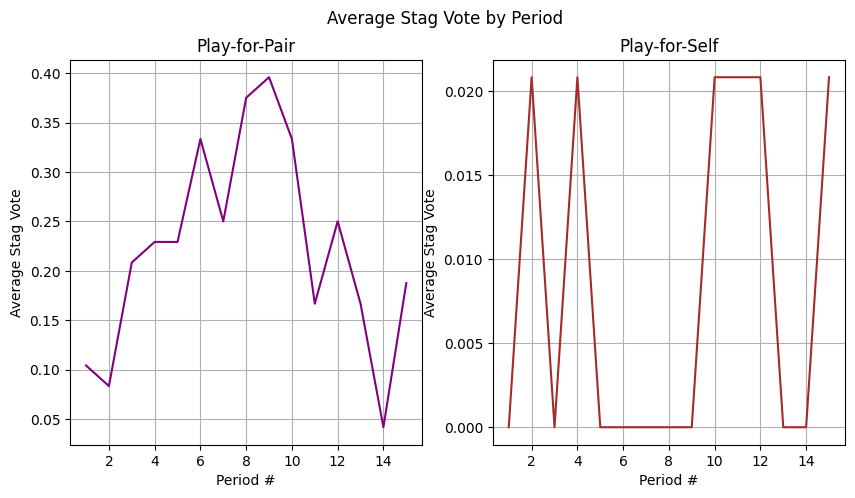

In [113]:
plt.figure(figsize=(10, 5))
plt.suptitle("Average Stag Vote by Period")
plt.subplot(1,2,1)
plt.title("Play-for-Pair")
pp_df.groupby(['period'])['decision'].mean().plot(color='purple')
plt.xlabel("Period #")
plt.ylabel("Average Stag Vote")
plt.grid()

plt.subplot(1,2,2)
plt.title("Play-for-Self")
ps_df.groupby(['period'])['decision'].mean().plot(color='brown')
plt.xlabel("Period #")
plt.ylabel("Average Stag Vote")
plt.grid()

plt.show()